In [2]:
# Parameter space for a narrow fjord
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [3]:
# Calculate the ratio of exchange flow velocity (Ve) over tidal velocity (Vt)
def Vel_Ratio(Qsg, U0, hs):

    file1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '/state_' + str(format(hs,'03d')) + '.nc') # Qf-only outputs
    file2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/tide' + str(format(U0,'03d')) + '/state_' + str(format(hs,'03d')) + '.nc') # Tide-only outputs
    t0 = 81
    tn = len(file1.T)
    state1 = file1.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(t0,tn))
    state2 = file2.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40),T=range(t0,tn))   
    xs = 72 # Xp1 index for the sill crest
    gh = np.repeat(np.array([[.5],[1],[1.5],[4],[8]]),10) # Grid height
    
    u1 = state1.U.data.mean(axis=(0,2))
    l1 = np.where(u1[:,xs] < 0)[-1][0] # Layer interface index
    ue = np.sum(u1[:l1,xs] * gh[:l1]) / np.sum(gh[:l1]) # Exchange flow velocity
    
    u2 = state2.U.data.mean(2)
    ut = np.empty(u2.shape[0])
    for i in range(u2.shape[0]):
        ui = u2[i,:,xs]
        l2 = np.where(ui == 0)[-1][0]
        ut[i] = np.abs(np.sum(ui[:l2] * gh[:l2]) / np.sum(gh[:l2])) # Tidal velocity at the sill
        
    return (ue / ut.mean())

In [ ]:
R = Vel_Ratio(700, 3, 9)
R

In [14]:
h = 150 # Maximum water column depth
hs = np.array([9, 12, 15, 18, 30]) # Sill depth
U0 = np.array([3, 6]) # Tidal current amplitude (cm/s) at OB
Qsg = np.array([350, 700]) # Subglacial discharge
T = 44714.16 # M2 tidal period

vr1 = np.empty([len(U0),len(hs)])
vr2 = np.empty([len(U0),len(hs)])
for j in range(len(U0)):
    for k in range(len(hs)):
        vr1[j,k] = Vel_Ratio(Qsg[0],U0[j],hs[k]) 
        vr2[j,k] = Vel_Ratio(Qsg[1],U0[j],hs[k])

#vr1, vr2

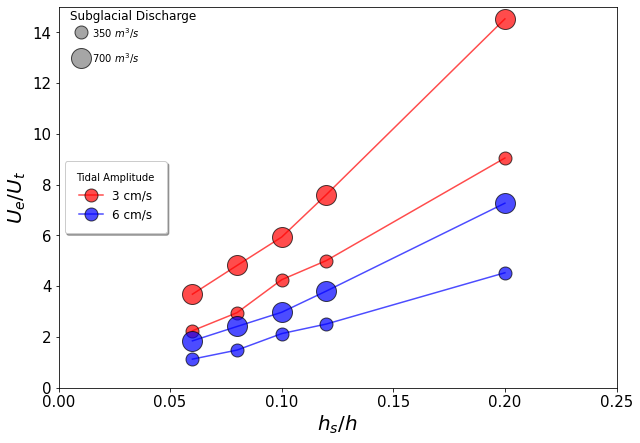

In [40]:

fig1, ax = plt.subplots(figsize=(10,7))
ax.set(xlim=(0, .25), ylim=(0, 15))
#ax.set_xlim([0,0.25])
#ax.set_ylim([0,15])
#plt.axis('square')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$h_s/h$', size=20, weight='bold')
plt.ylabel(r'$U_e/U_t$', size=20, weight='bold')


x_mark = [.01, .01]
y_mark = [13, 14]
plt.plot(x_mark[0],y_mark[0], marker='o', alpha=.7, ms=2*(7+3), color='grey', markeredgecolor='k')
plt.plot(x_mark[1],y_mark[1], marker='o', alpha=.7, ms=2*(3.5+3), color='grey', markeredgecolor='k')
plt.text(x_mark[0]+5e-3, y_mark[0]-0.2, '700 $m^3/s$', fontsize=10)
plt.text(x_mark[1]+5e-3, y_mark[1]-0.2, '350 $m^3/s$', fontsize=10)
ax.text(5e-3,14.5, r'Subglacial Discharge', size=12)


p1, = plt.plot(hs/h,vr1[0,:], marker='o', alpha=.7, ms=2*(3.5+3), color='r', markeredgecolor='k', label='3')
p2, = plt.plot(hs/h,vr1[1,:], marker='o', alpha=.7, ms=2*(3.5+3), color='b', markeredgecolor='k', label='6')
p3, = plt.plot(hs/h,vr2[0,:], marker='o', alpha=.7, ms=2*(7+3), color='r', markeredgecolor='k', label='3')
p4, = plt.plot(hs/h,vr2[1,:], marker='o', alpha=.7, ms=2*(7+3), color='b', markeredgecolor='k', label='6')

ax.legend(([p1, p2]), ['3 cm/s', '6 cm/s'], fancybox=True, framealpha=1, shadow=True, borderpad=1,
              title='Tidal Amplitude', fontsize=12, loc='center left')
#from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
#l = plt.legend([(p1, p2)], ['Two keys', ''], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)})

#ax.legend(loc='best', fontsize=12, title=r'$U_0(cm/s)$')
#for i in range(len(files1)): 
#    Ff1, P1 = hydro_control(files1[i], Qf[i], Hs, xloc)
#    Ff2, P2 = hydro_control(files2[i], Qf[i], Hs, xloc)
#    plt.plot([P1],[Ff1], marker='o', alpha=.7, ms=2*(i+3), color='b', markeredgecolor='k')
#    plt.plot([P2],[Ff2], marker='o', alpha=.7, ms=2*(i+3), color='r', markeredgecolor='k')



In [ ]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/Transport/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig.savefig(fig_path + '/HC10.png', dpi , bbox_inches='tight')

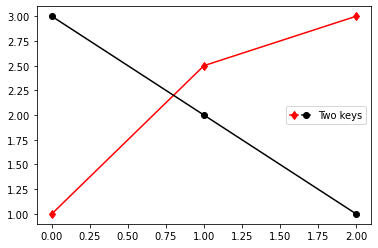

In [27]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

p1, = plt.plot([1, 2.5, 3], 'r-d')
p2, = plt.plot([3, 2, 1], 'k-o')

l = plt.legend([(p1, p2)], ['Two keys'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)})